# Louvain Modularity Algorithm on Toy Dataset

## Import libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import pandas as pd
import numpy as np
import re
from nf1 import NF1

In [2]:
%matplotlib inline

In [3]:
path = 'C:/Users/Simon/Desktop/CS5344 Group Project/'

## Create networkX graph 

In [4]:
G = nx.read_edgelist("C:/Users/Simon/Desktop/CS5344 Group Project/toy_edgelist.txt",
                     create_using = nx.Graph(), nodetype = int, delimiter= '\t')

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 111
Average degree:   6.5294


In [6]:
#first compute the best partition
%time partition = community_louvain.best_partition(G)

Wall time: 9.98 ms


In [7]:
# gets all the communities for the louvain method (USE F1 package convert to tuple)
node_comm = []
for com in set(partition.values()) :                            #iterating through communities (in this case 0-4)
    list_nodes = [nodes for nodes in partition.keys()           #iterating through all nodes
                                if partition[nodes] == com]
    node_comm.append(tuple(list_nodes))
node_comm

[(1, 2, 3, 4, 5, 6, 25, 7, 8),
 (33, 32, 34, 31, 35, 36, 37),
 (42, 41, 44, 43, 45),
 (17, 13, 11, 12, 14, 15, 16),
 (27, 21, 26, 22, 23, 24)]

## Read in ground truth 

In [8]:
toy_cmty_df =pd.read_csv(path + 'toy_cmty.txt', delimiter='\t', header= None)
toy_cmty_df.head()

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6.0,7.0,8.0,25.0
1,11,12,13,14,15,16.0,17.0,NaN,NaN
2,21,22,23,24,26,27.0,NaN,NaN,NaN
3,31,32,33,34,35,36.0,37.0,NaN,NaN
4,41,42,43,44,45,NaN,NaN,NaN,NaN


In [9]:
# Convert to proper form for nf1 calculation
toy_cmty_list = []
for row in range(len(toy_cmty_df)):
    toy_cmty_list.append(list(toy_cmty_df.iloc[row].dropna()))
    
for pos in range(len(toy_cmty_list)):
    toy_cmty_list[pos] = list(pd.to_numeric(toy_cmty_list[pos], downcast='integer'))
    
toy_cmty_list

[[1, 2, 3, 4, 5, 6, 7, 8, 25],
 [11, 12, 13, 14, 15, 16, 17],
 [21, 22, 23, 24, 26, 27],
 [31, 32, 33, 34, 35, 36, 37],
 [41, 42, 43, 44, 45]]

In [10]:
# Calculate f1 for toy dataset
nf = NF1(node_comm, toy_cmty_list)
results = nf.summary()
print(results['scores'])
print(results['details'])

                          Value
Index                          
Ground Truth Communities    5.0
Identified Communities      5.0
Community Ratio             1.0
Ground Truth Matched        1.0
Node Coverage               1.0
NF1                         1.0
   F1 min  F1 max  F1 mean  F1 mode  F1 std
0     1.0     1.0      1.0      1.0     0.0


C:\Users\Simon\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


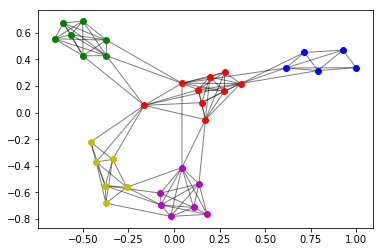

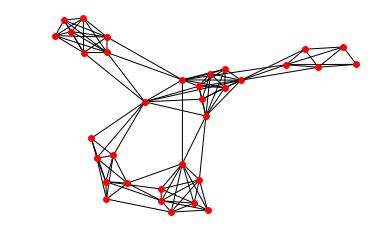

In [11]:
#drawing
node_col = ['r', 'g', 'b', 'm', 'y']
size = float(len(set(partition.values())))                      #number of unique communities (in this case 5 communities)
pos = nx.spring_layout(G)                                       #position of node
count = 0.
for com in set(partition.values()) :                            #iterating through communities (in this case 0-4)
    node_colour = node_col[com]
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()           #iterating through all nodes
                                if partition[nodes] == com]     #for each iteration, get community number for each node if node belongs to community, store in node list
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 35,
                                node_color = node_colour)
                                #node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


plt.axis("off")
nx.draw_networkx(G, pos = pos, with_labels = None, node_size =35)

In [12]:
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

modularity: 0.5985715445174905
